<a href="https://colab.research.google.com/github/pchernic/python_for_financial_data/blob/main/%5BBR_STOCKS%5D_Stock_Portfolio_Optimization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [66]:
import pandas as pd
import numpy as np

import yfinance as yf
from datetime import date, timedelta

import matplotlib.pyplot as plt
import seaborn as sns


## Setting period, defing portfolio and getting data

In [41]:
# time period definition
end = date.today().strftime("%Y-%m-%d")
start = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stocks
tickers = ['WEGE3.SA', 'VALE3.SA', 'BBAS3.SA', 'PRIO3.SA', 'PETR4.SA', 'LREN3.SA', 'ITSA4.SA']

# Getting data from yfinance
data = yf.download(tickers, start=start, end=end, progress=False)

# Raw Data
data.head()

Price       Adj Close                                                        \
Ticker       BBAS3.SA  ITSA4.SA   LREN3.SA   PETR4.SA   PRIO3.SA   VALE3.SA   
Date                                                                          
2023-08-24  22.231512  8.313469  16.132406  27.287367  45.986141  56.873909   
2023-08-25  21.941639  8.225402  15.864966  27.100872  46.315609  56.755043   
2023-08-28  22.572819  8.357502  15.950929  27.406046  46.615128  57.568829   
2023-08-29  22.699055  8.436762  15.950929  27.465384  45.776474  59.406719   
2023-08-30  22.371775  8.313469  15.702591  27.651873  45.736542  59.415867   

Price                      Close                       ...       Open  \
Ticker       WEGE3.SA   BBAS3.SA  ITSA4.SA   LREN3.SA  ...   PRIO3.SA   
Date                                                   ...              
2023-08-24  35.311302  23.775000  8.990476  16.889999  ...  45.900002   
2023-08-25  35.684246  23.465000  8.895238  16.610001  ...  46.459999   
2023-08-28  35.939415  24.139999  9.038095  16.700001  ...  46.410000   
2023-08-29  35.811832  24.275000  9.123809  16.700001  ...  47.000000   
2023-08-30  35.625359  23.924999  8.990476  16.440001  ...  45.970001   

Price                               Volume                                \
Ticker       VALE3.SA   WEGE3.SA  BBAS3.SA  ITSA4.SA  LREN3.SA  PETR4.SA   
Date                                                                       
2023-08-24  62.689999  36.450001  12775200  16951515  21462700  49332300   
2023-08-25  62.669998  35.980000  17948200  55995030  14766500  34079000   
2023-08-28  62.430000  36.520000  15418400  37868985  17213700  24956100   
2023-08-29  63.380001  36.759998  19569600  18464040  11104000  40607500   
2023-08-30  65.209999  36.650002  11510800  14215740  11429900  34637900   

Price                                   
Ticker     PRIO3.SA  VALE3.SA WEGE3.SA  
Date                                    
2023-08-24  4785000  17821500  7784400  
2023-08-25  5710400  11395300  6243500  
2023-08-28  4810400  14173600  4461100  
2023-08-29  8537100  28625700  3816100  
2023-08-30  4725000  21812600  4406700  

[5 rows x 42 columns]

## Data Cleaning


In [42]:
# melt function: reset index to bring Date into the columns
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame: Obtains attributes (Open, High, Low, etc.) formatted as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
df = data_pivoted.reset_index()


## Formatted data

In [43]:
df.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-08-24,BBAS3.SA,22.231512,23.775000,24.049999,23.665001,24.049999,12775200.0
1,2023-08-24,ITSA4.SA,8.313469,8.990476,9.076190,8.942857,9.066666,16951515.0
2,2023-08-24,LREN3.SA,16.132406,16.889999,17.549999,16.750000,17.360001,21462700.0
3,2023-08-24,PETR4.SA,27.287367,32.189999,32.720001,31.840000,32.270000,49332300.0
4,2023-08-24,PRIO3.SA,45.986141,46.060001,46.490002,45.400002,45.900002,4785000.0


In [44]:
#  Converting Date to datetime and setting as index
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
df.reset_index(inplace=True)

## Visualizing Adjusted Close Price Over Time

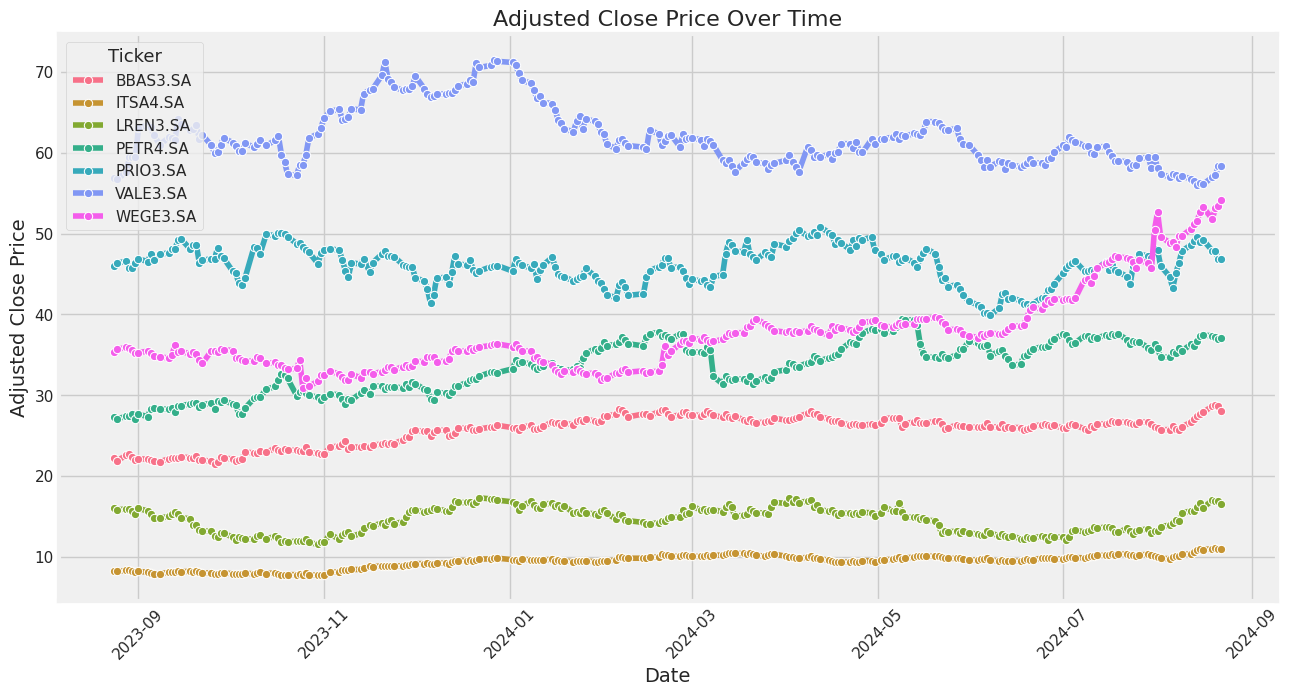

In [45]:
#import matplotlib.pyplot as plt
#import seaborn as sns


plt.figure(figsize=(14, 7))
sns.set_style('dark')
plt.style.use('fivethirtyeight')

sns.lineplot(data=df, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

## 50-day and 200-day moving averages

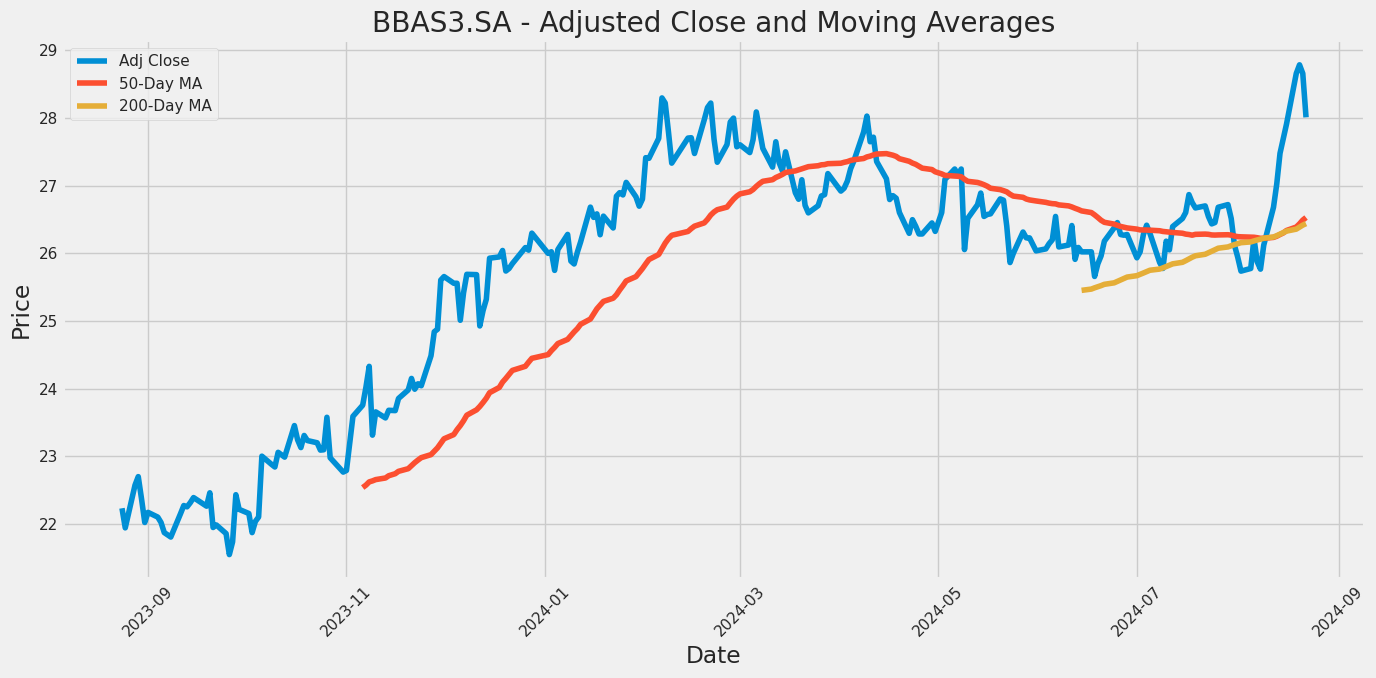

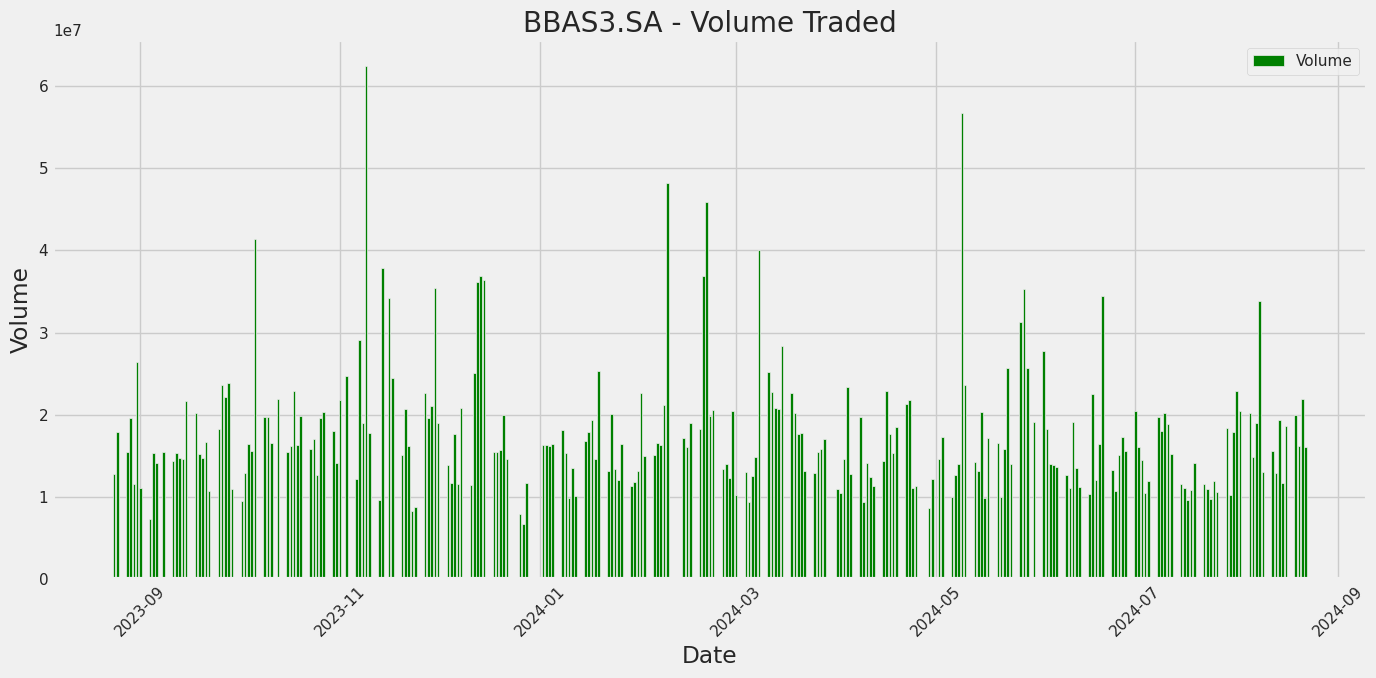

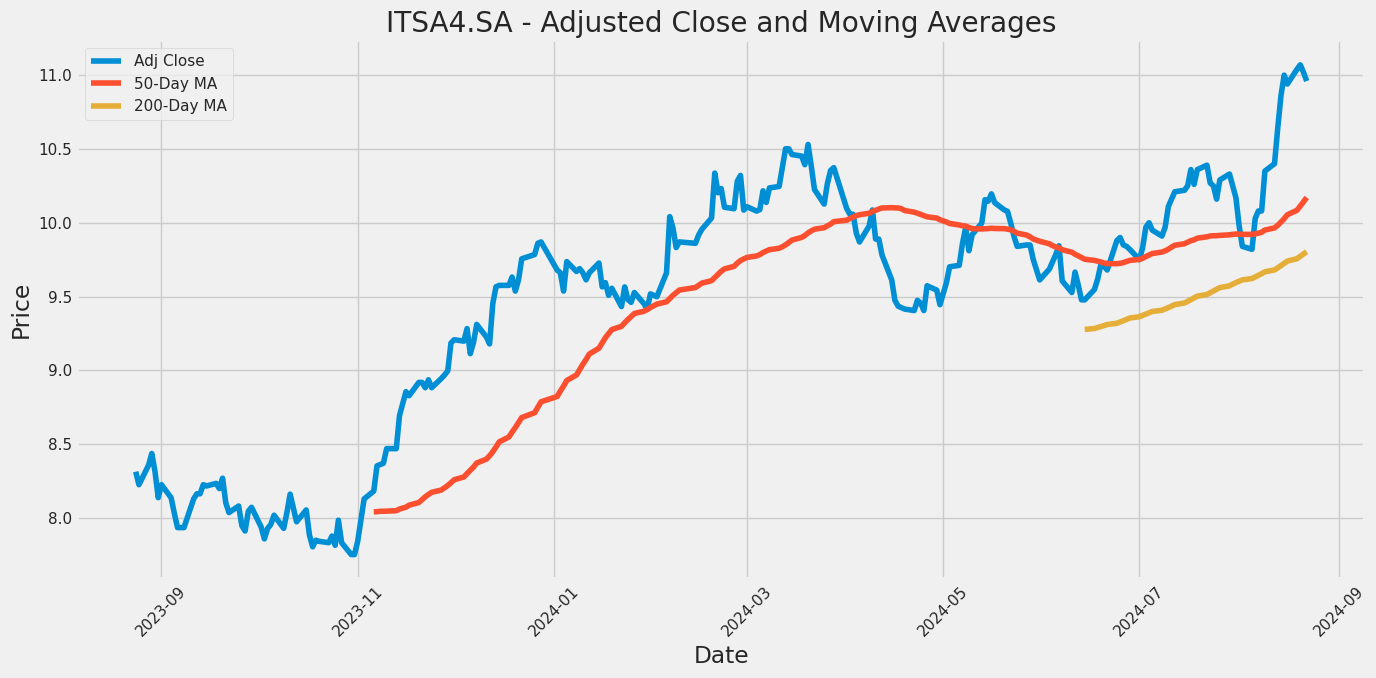

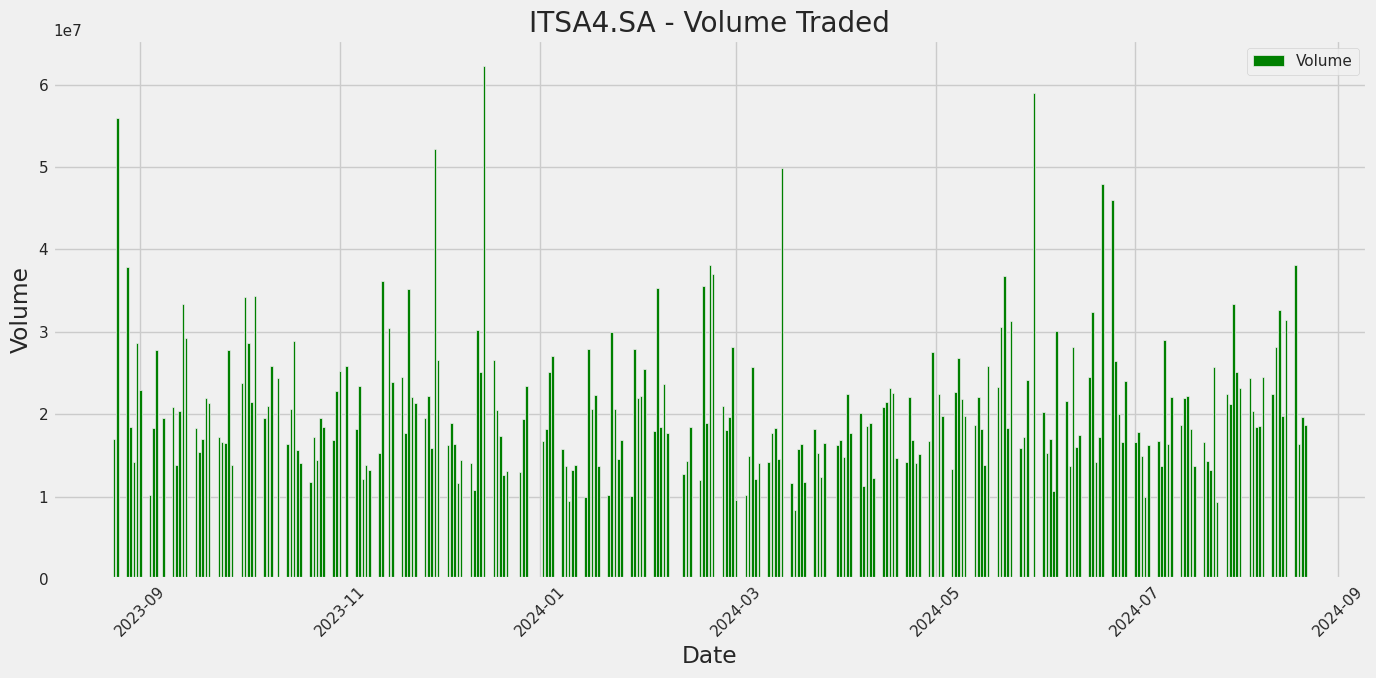

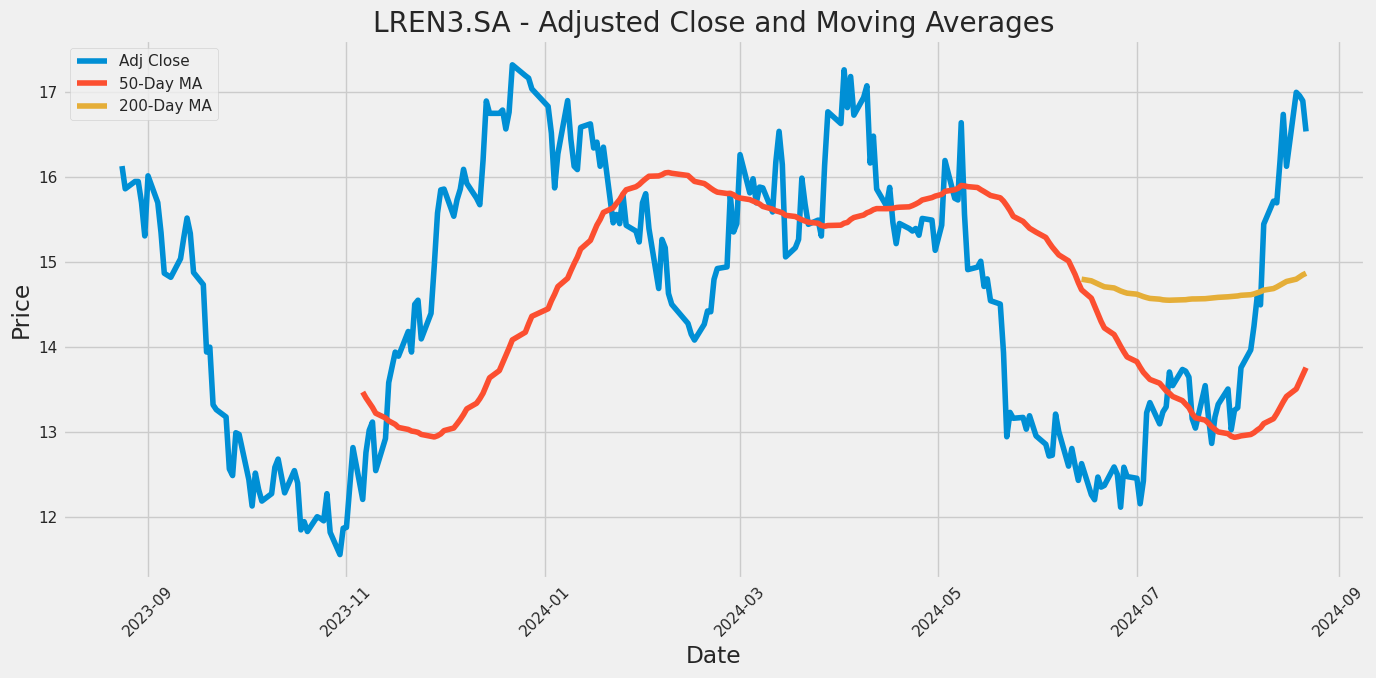

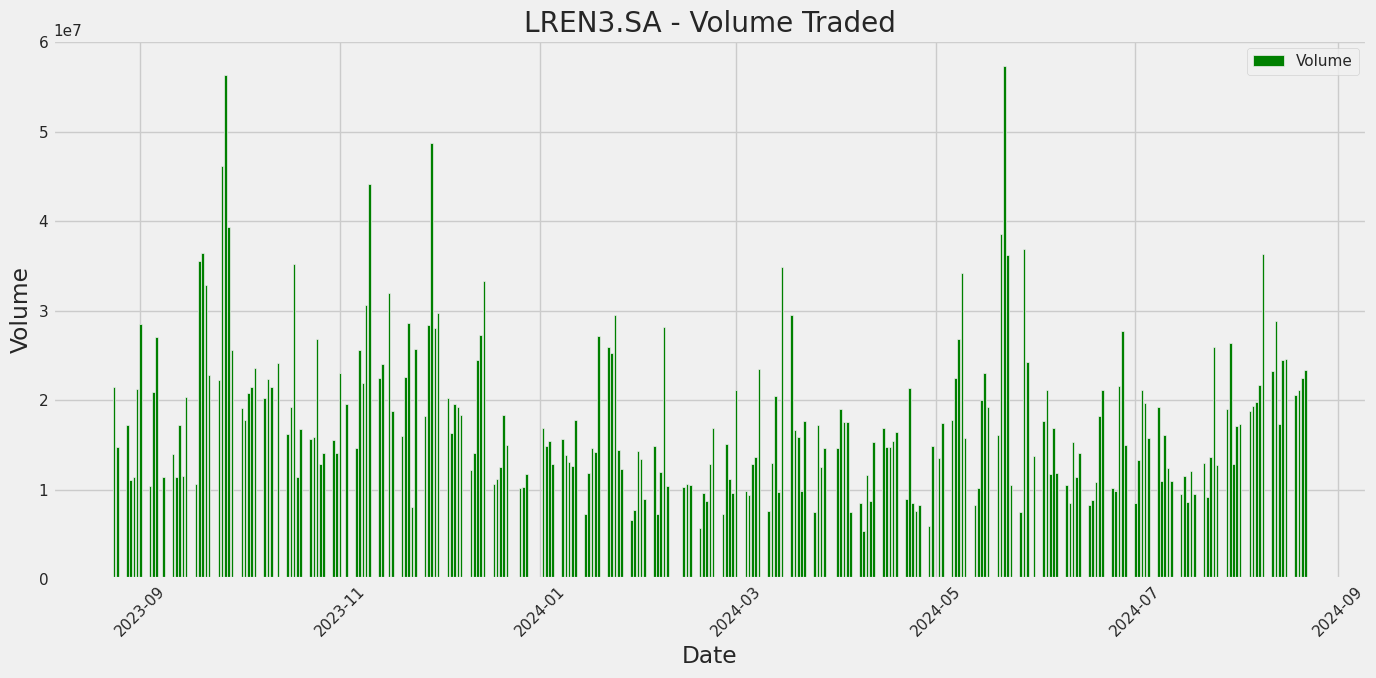

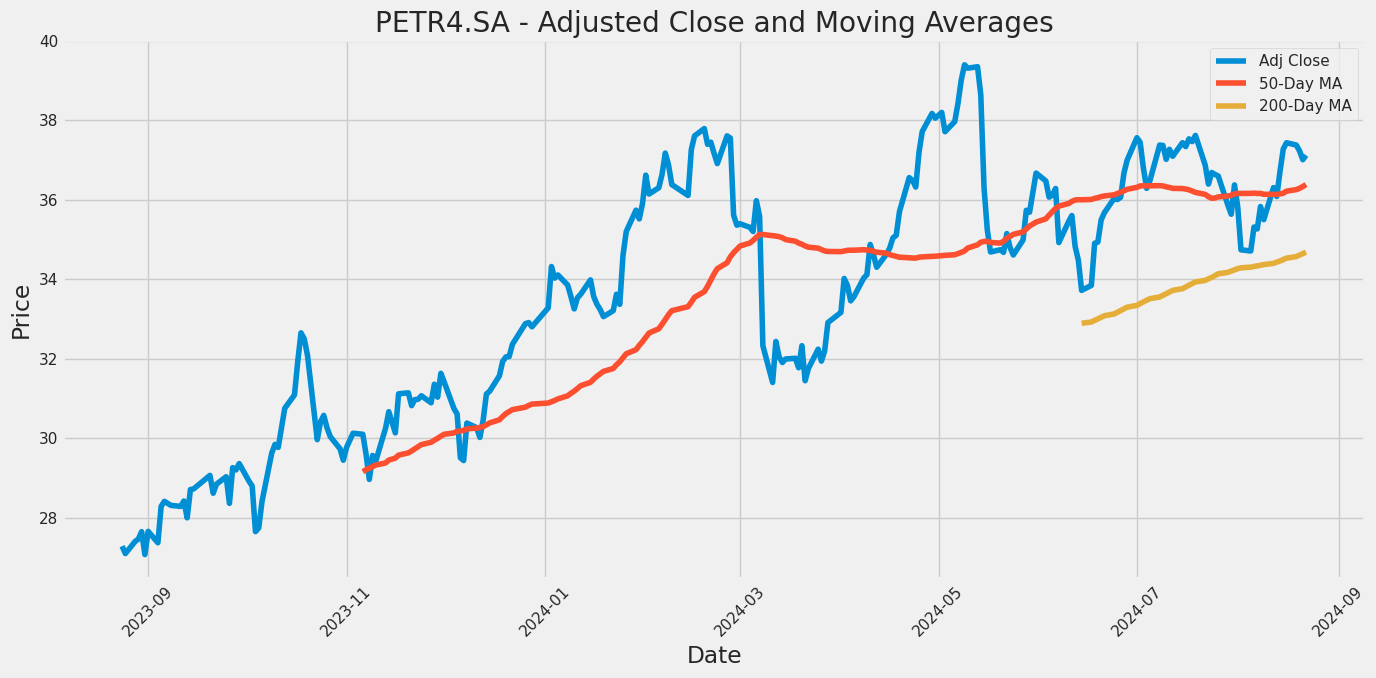

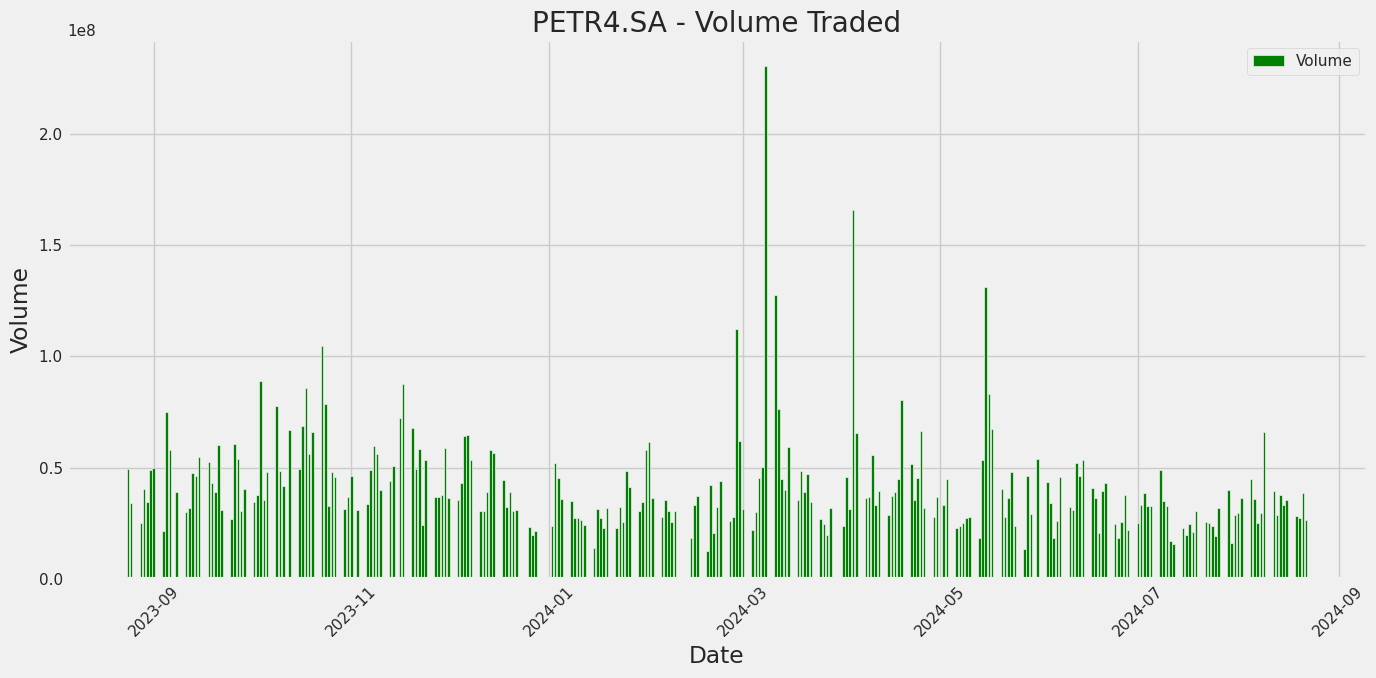

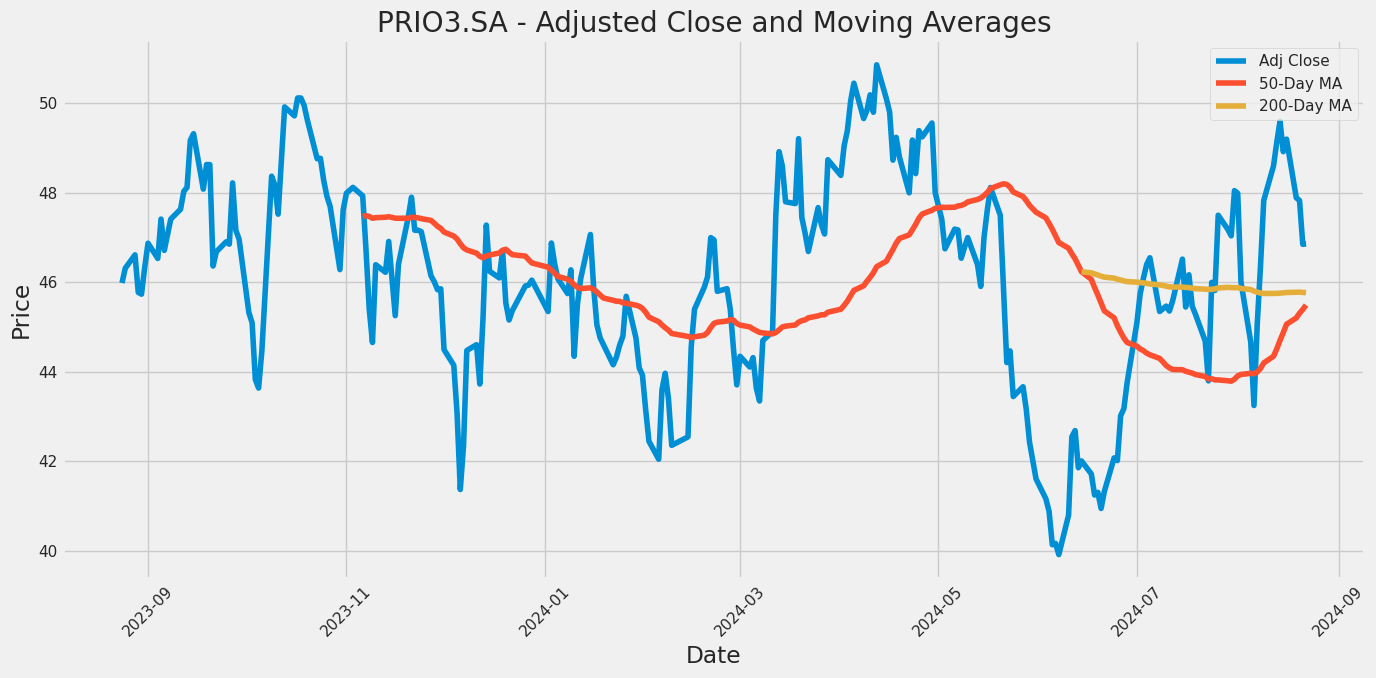

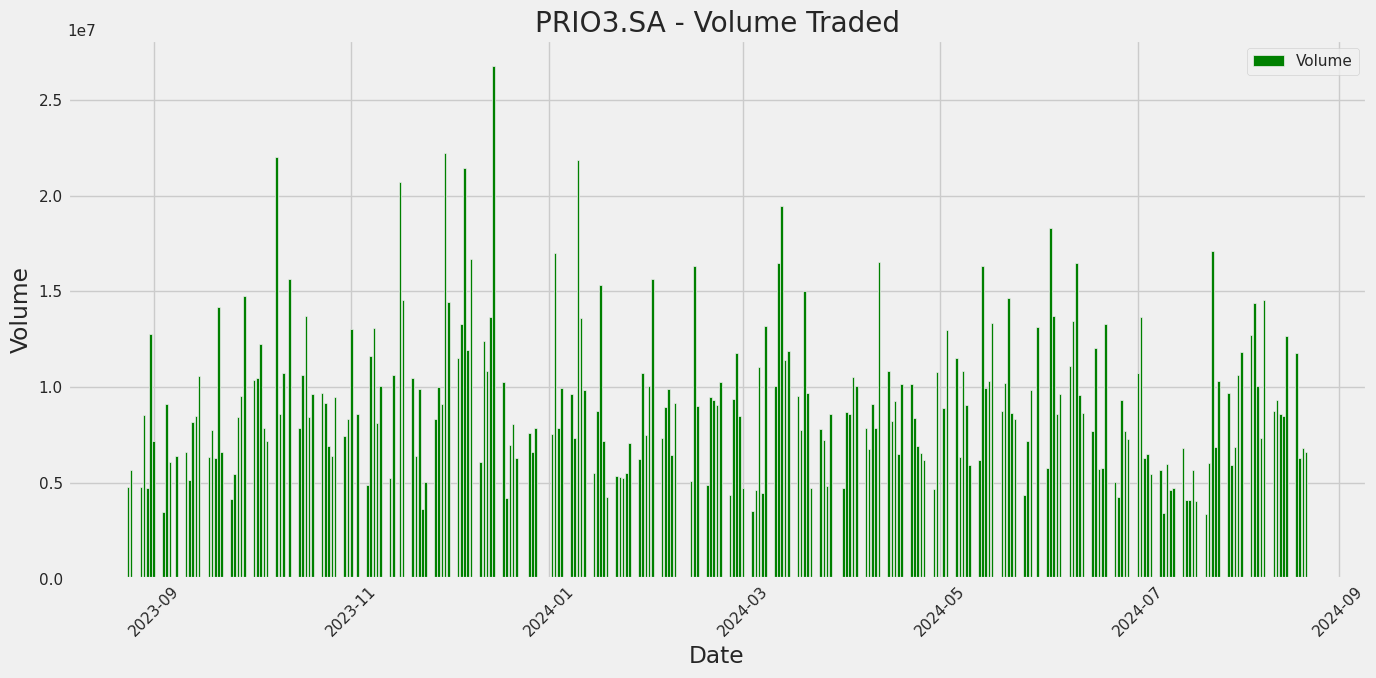

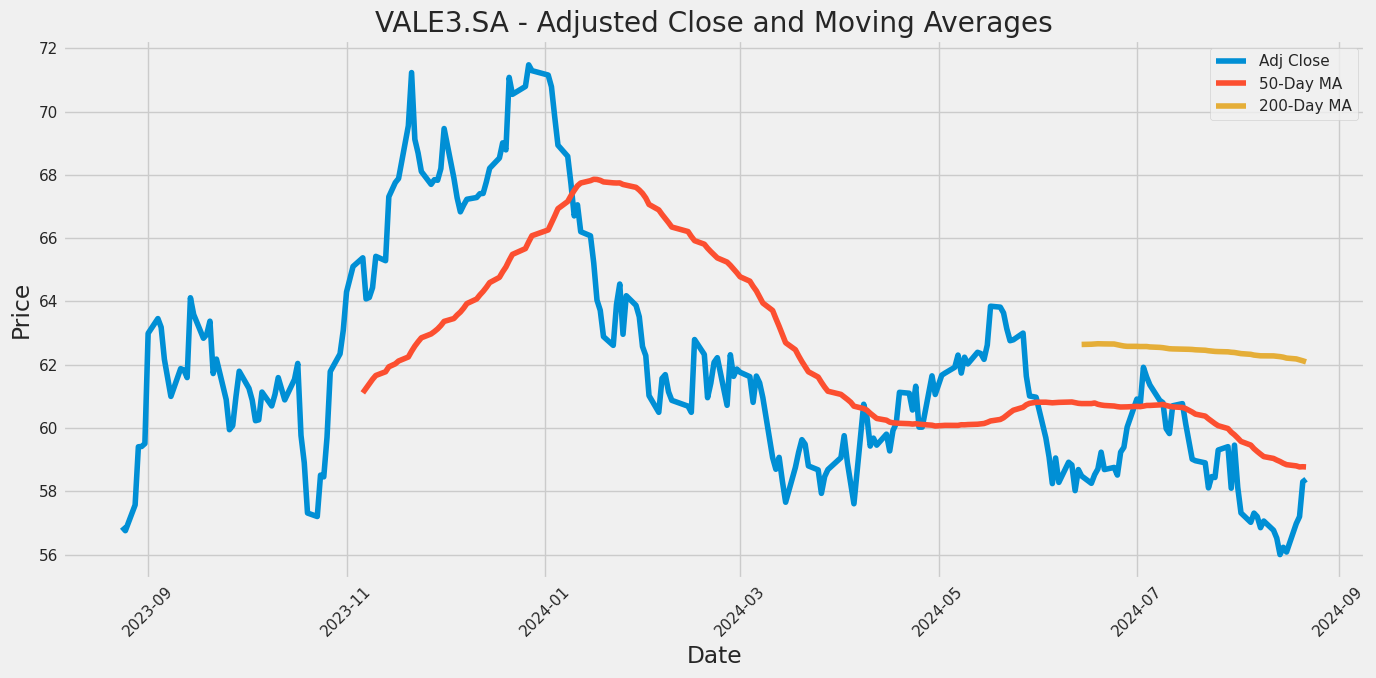

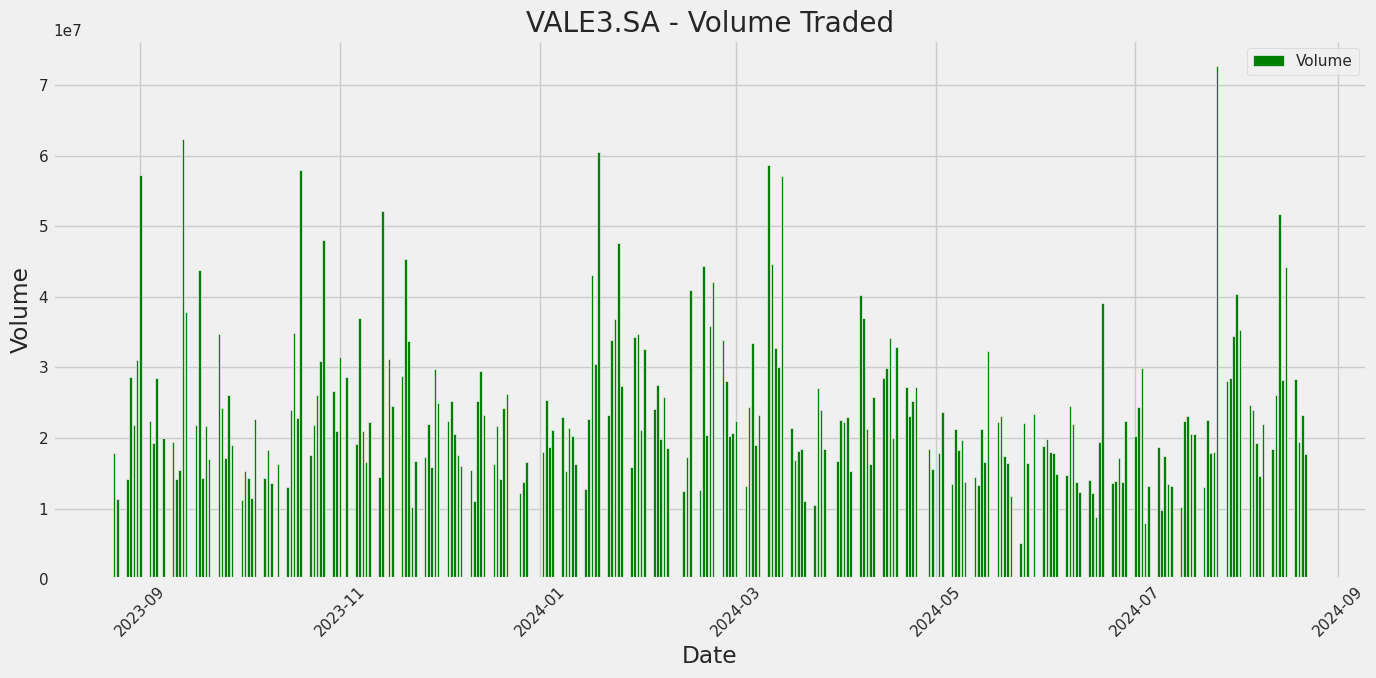

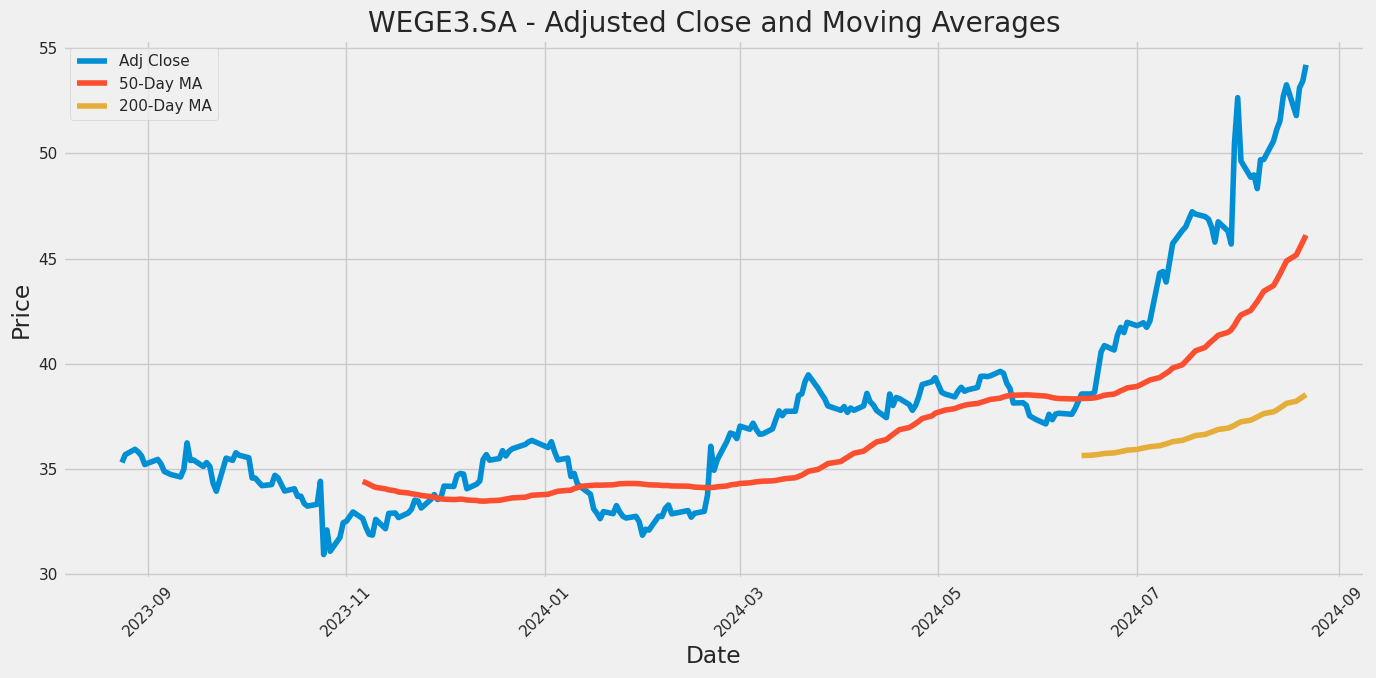

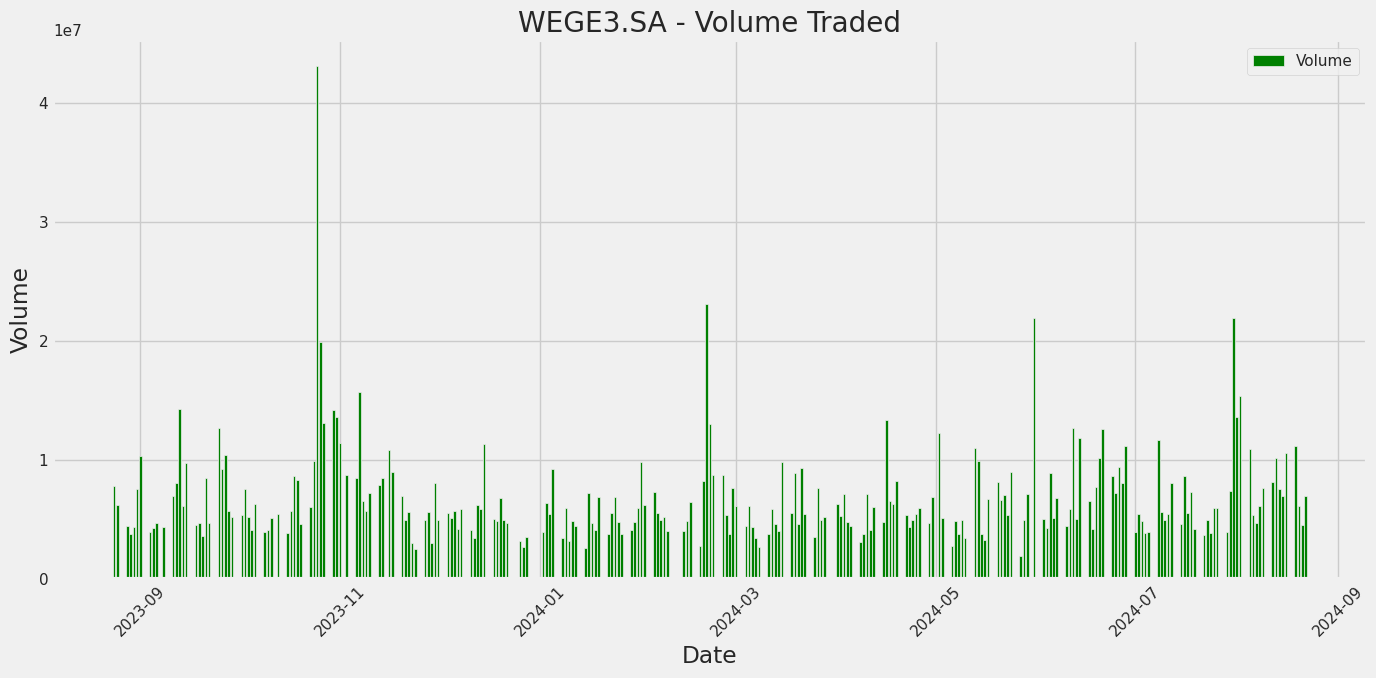

In [46]:
short_window = 50
long_window = 200

df.set_index('Date', inplace=True)
unique_tickers = df['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = df[df['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='green')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Daily returns Distribution Visualization


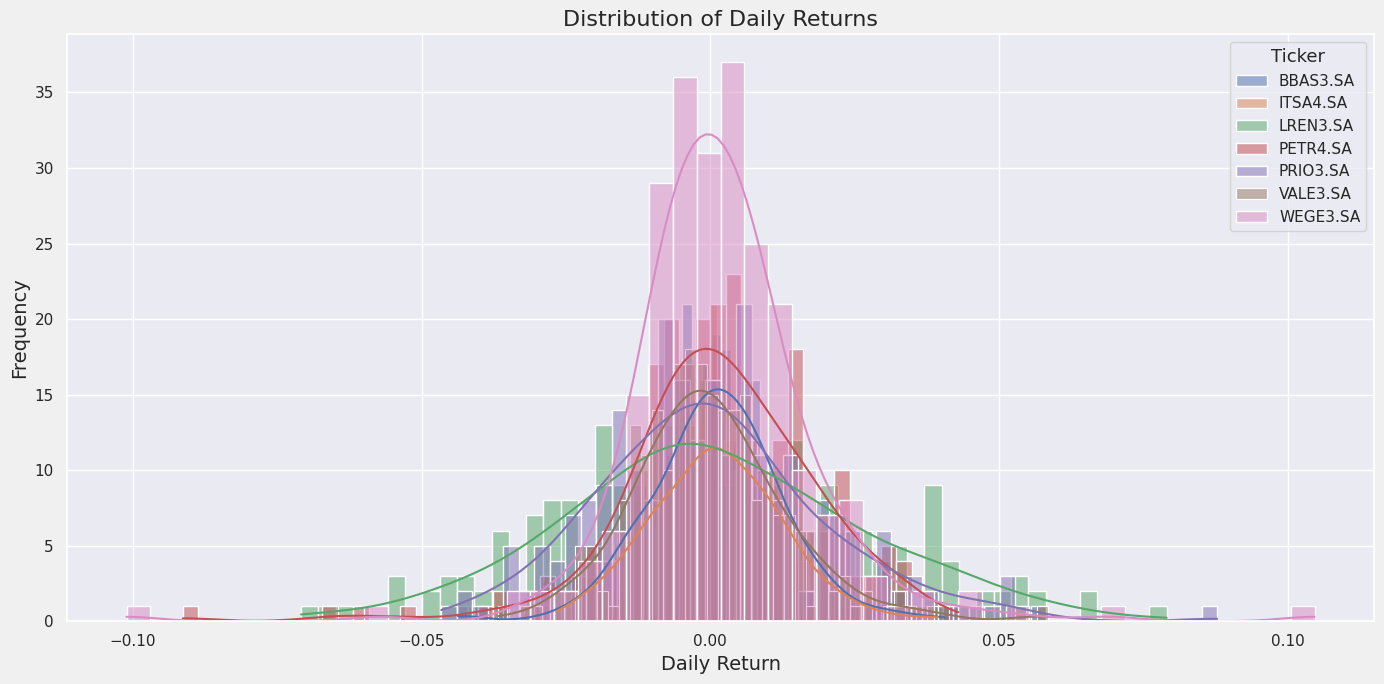

In [47]:

df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change() # Daily returns group by tickers

plt.figure(figsize=(14, 7))
sns.set(style='darkgrid')

for ticker in unique_tickers:
    ticker_data = df[df['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation

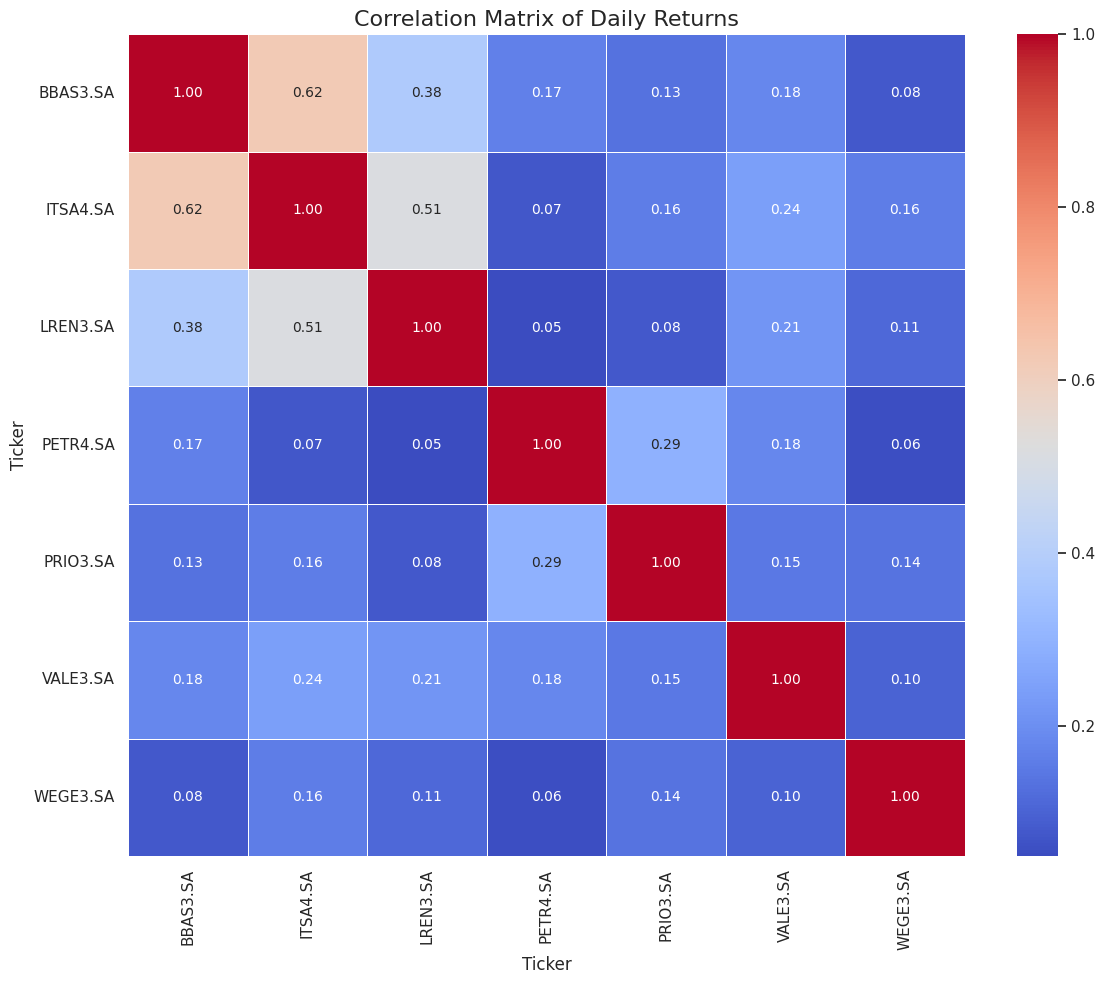

In [48]:
daily_returns = df.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
daily_returns.corr()

Ticker,BBAS3.SA,ITSA4.SA,LREN3.SA,PETR4.SA,PRIO3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,
BBAS3.SA,1.000000,0.621831,0.380701,0.167424,0.131008,0.180395,0.077693
ITSA4.SA,0.621831,1.000000,0.513623,0.072733,0.157468,0.238776,0.156821
LREN3.SA,0.380701,0.513623,1.000000,0.049034,0.077309,0.213597,0.110507
PETR4.SA,0.167424,0.072733,0.049034,1.000000,0.294181,0.182419,0.055210
PRIO3.SA,0.131008,0.157468,0.077309,0.294181,1.000000,0.149210,0.137272
VALE3.SA,0.180395,0.238776,0.213597,0.182419,0.149210,1.000000,0.100222
WEGE3.SA,0.077693,0.156821,0.110507,0.055210,0.137272,0.100222,1.000000


**Highest Correlations:**

- The pair with the highest positive correlation is between **BBAS3.SA** (Banco do Brasil) and **ITSA4.SA** (Itaúsa), with a correlation coefficient of approximately 0.62. This suggests that when one stock's returns increase, the other tends to follow suit. It makes sense even without analyzing data, as both are banks with a similar focus.

- Another notable positive correlation exists between **ITSA4.SA** and **LREN3.SA** (Lojas Renner), with a coefficient of around 0.51. Investors might observe similar movements in these two stocks.

- **PRIO3.SA** (PetroRio) and **PETR4.SA** (Petrobras) also exhibit a positive correlation of about 0.29, indicating some alignment in their returns. Personally, I expected a higher correlation between these two.

**Lowest Correlations:**

- The pair with the lowest correlation is **WEGE3.SA** (WEG) and **PETR4.SA**, with a coefficient of approximately 0.06. These stocks seem to move independently of each other. Similarly, **WEGE3.SA** and **PRIO3.SA** have a low correlation (around 0.14), suggesting limited association. **VALE3.SA** (Vale) and **WEGE3.SA** also exhibit a weak correlation (approximately 0.10).


___________

However, it's important to emphasize that **correlation does not imply causation.** Understanding these relationships remains crucial for diversification and risk management.

## Portfolio Optimization

In [59]:


expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
BBAS3.SA,0.252224,0.186556
ITSA4.SA,0.297211,0.180752
LREN3.SA,0.110401,0.413573
PETR4.SA,0.349103,0.268087
PRIO3.SA,0.067998,0.314493
VALE3.SA,0.049988,0.217611
WEGE3.SA,0.471162,0.267129




1. **Expected Return:**
   - Among the stocks, **WEGE3.SA** (WEG) has the highest expected return, approximately 0.47. This suggests that historically, WEG has delivered strong returns on average.
   - **PETR4.SA** (Petrobras) follows with an expected return of around 0.35.
   - **ITSA4.SA** (Itaúsa) and **BBAS3.SA** (Banco do Brasil) have expected returns of approximately 0.30 and 0.25, respectively.

2. **Volatility:**
   - **LREN3.SA** (Lojas Renner) exhibits the highest volatility (around 0.41), indicating significant price fluctuations.
   - **PRIO3.SA** (PetroRio) also has relatively high volatility (approximately 0.31).
   - **VALE3.SA** (Vale) has the lowest volatility (about 0.22).





## Efficient frontier:

In here the goal is to analyse Sharpe ratio, which is a measure of risk-adjusted return.

Each dot represents a portfolio, and its color indicates its risk-adjusted returns.

The highest returns at a given level of volatility are positioned closer to the y-axis. These are what we are looking for. The darker blue area of the plot is where we can possibly obtain higher Sharpe ratios, as they represent better risk-adjusted returns.  

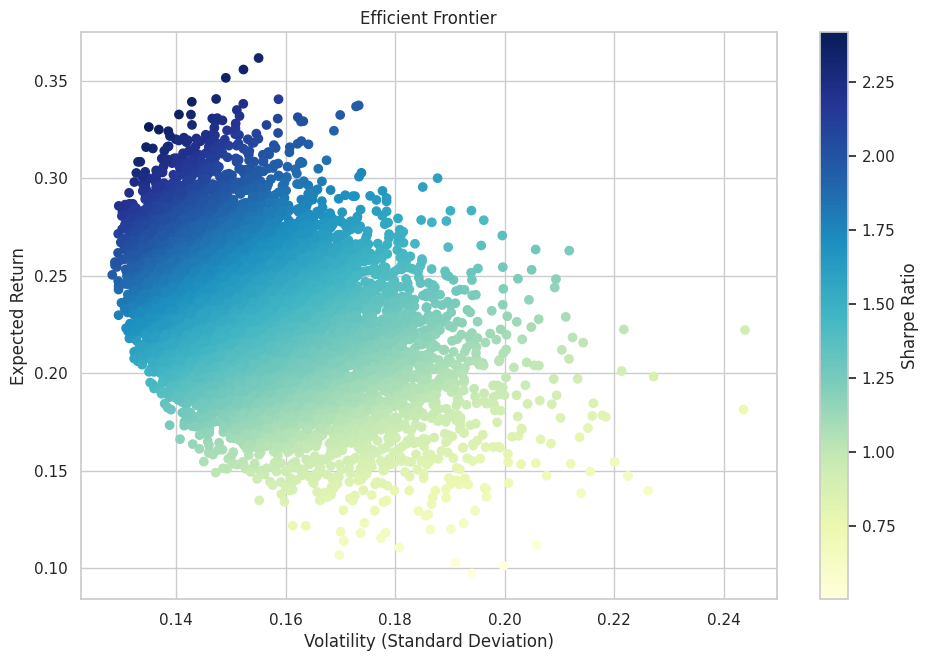

In [63]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

## Sharpe ratio:
Identifying which portfolio has maximum Sharpe ratio

In [67]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio


print("Maximum Sharpe Ratio Portfolio:")
print()
print(f"- Expected Return: {max_sharpe_return}")
print(f"- Volatility (Standard Deviation): {max_sharpe_volatility}")
print(f"- Sharpe Ratio: {max_sharpe_ratio}")

Maximum Sharpe Ratio Portfolio:

- Expected Return: 0.32631252384208564
- Volatility (Standard Deviation): 0.13502877635161636
- Sharpe Ratio: 2.416614685097674


## Efficient Portfolio Suggested Allocations:

In [74]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df


sorted_weights = portfolio_weights_df.sort_values(by='Weight', ascending=False)
sorted_weights

,Ticker,Weight
6,WEGE3.SA,0.271398
0,BBAS3.SA,0.254309
1,ITSA4.SA,0.184180
5,VALE3.SA,0.175274
2,LREN3.SA,0.041943
3,PETR4.SA,0.040018
4,PRIO3.SA,0.032879


# Conclusion

In this project, our goal was to achieve a portfolio allocation seeking maximized returns while minimizing risks. This means leveraging individual performance while trying to maximize protection with diversification, investing in low correlated assets.

This analysis led to the conclusion that WEGE3 has the highest suggested allocation. This indicates its substantial contribution to the portfolio’s performance. In contrast, PRIO3 has the smallest allocation.


